# **Eat OUT Recommendation System**

##### **Group 1 (i.e. Foodies) members**:
<ul type='square'> 
    <li> David Mwiti</li>
    <li> Karen Amanya</li>
    <li> Mercy Onduso </li>
    <li> Nicholus Magak </li>
    <li> Penina Wanyama </li>
    <li> Stephen Thuo </li>
</ul>

# 1.0  Business Understanding

# **Overview**


# 1.1 Problem Statement


EatOut is a food tech and media business primarily based in Kenya and East Africa. It was founded in 2010 and allows consumers to search through hundreds of restaurants, curating information such as photos, menus, maps, contacts, events, offers and reviews. In this social media age, individuals are moving towards restaurant recommendations given by influencers and other users on platforms such as Instagram and TikTok as they come with a personal review of the food, service and aesthetic feel of the place. This is primarily because a 1-to-5-star rating is not as informative as a video and personal review of a restaurant from a person that has been to place. As a result, many restaurants and hotels are also shifting more towards such platforms as a marketing tool and away from food tech businesses like EatOut meaning less website visits and eventually a drop in revenue for the business.
 They can gain a competitive edge in the market by adding a more personalized feel to their website that will allow users to easily find restaurants and hotels not just based on the cuisine or rank of the rating. This can be achieved by using a content recommender system that is also based on the explicit feedback given by another person and not just the standard approach where recommendations are given according to similarities between them. This will allow the user to simply use key words of the experience they are looking to have and get faster and more relevant recommendations without having to scroll through thousands of items.




# 1.2 Objectives
> **General Objective:**

The general objective of this project is to improve the user experience of the EatOut website and help the business better position themselves in the market to gain a competitive edge and drive back their marketing revenue.
> **Specific Objectives:**

1.	To build a recommender system that will accurately match a user to a restaurant or hotel that is most likely to provide the experience they are looking to have.
2.	To identify the factors that greatly affect a person’s rating or review of a restaurant e.g., service, location, ambience or food.
3.	To improve on the optimization of the EatOut website for both the user and business.



#       1.3 Research Questions


1.	What features influence a person’s choice and review of a restaurant or hotel?
2.	How can we use explicit user reviews to improve on the accuracy and speed of already existing recommender systems?
3.	How can we optimize the EatOut website to compete with other sources of restaurant recommendations such as social media influencers?



# 1.4 Success Criteria

As the aim of the project is to add a personalized experience to the website, the project’s success will be measured based on its ability to provide fast and relevant recommendations according to key words in a person’s search.

The success criteria we will follow depends on the predictive accuracy of the recommendations. This means we will rate how close the estimated ratings are to genuine use ratings, which is a measure used for evaluating non-binary ratings (e.g. 1-10 scale). Since selling books is crucial for a platform that is in business, this is the best metric we decided to use.

The two metrics that we will use are Mean Squared Error (M.S.E) and Root Mean Squared Error (R.M.S.E) due to the fact the rating scale is the same throughout.


# 2.0.0  EXPLORATORY DATA ANALYSIS(EDA)

*Importing the required libraries*

In [1]:
#libraries for data extraction
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')
import sidetable

#libraries for Data Modelling and evaluation
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import operator
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

# download nltk packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nyakerario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nyakerario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nyakerario\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nyakerario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2.1.0 *Data Understanding*

# 2.1.1 Data Overview

The data being used on this project was object after scraping on Yelp. It is meant to be used as a mockup for how Eat Out's data could look like on the probability our recommender is accepted.

The data contains two files: 

* **_restaurants.csv_**

Contained the restaurants we desired to recommend. A few notable features in the dataset are name(of restaurant), avg_rating, pricing_range, & cuisine. Regional data we have is from New York hence there is a location field with the restaurants' individual locs.

* **_final_revs.csv_**

Contained user info from the individual restaurants. Users have identification  based on their account links. Other features include (Username, date of review, individual rating). We were also able to acquire comments from users which can be used to give restaurants more context. 


#### **Loading the data**

##### _**1. restaurants_df**_

In [2]:
restaurant_df = pd.read_csv('restaurant_data.csv', encoding='utf-8', error_bad_lines='skip', low_memory=False)
restaurant_df.head()

,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location,Phone,Display Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.995970,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",1.212367e+10,(212) 367-1979,3526.365252,[{'text': 'This small and crowded place seems ...,3,"I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,40.730409,-73.986127,"['delivery', 'pickup', 'restaurant_reservation']","174 2nd Ave, New York, NY 10003",1.212255e+10,(212) 254-5370,2645.074283,[{'text': 'Absolutely LOVED LoveMama!! As a co...,3,"T, h, a, i",jjJc_CrkB2HodEinB6cWww,6377
2,Ye's Apothecary,5,$$$,https://www.yelp.com/biz/yes-apothecary-new-yo...,40.719450,-73.989800,[],"119 Orchard St, New York, NY 10002",NaN,NaN,1638.756115,[{'text': 'Edy and Josh are the BEST bartender...,3,"S, z, e, c, h, u, a, n",8YWLuLUKj0t_0_Xv06UUtw,212
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,40.715661,-73.996701,"['delivery', 'pickup']","46 Bowery St, New York, NY 10013",1.212234e+10,(212) 233-8888,1766.176007,[{'text': 'This is the third stop of our food ...,3,"S, h, a, n, g, h, a, i, n, e, s, e",0CjK3esfpFcxIopebzjFxA,7098
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,40.714253,-73.965448,"['delivery', 'pickup']","66 S 2nd St, Brooklyn, NY 11249",1.718782e+10,(718) 782-2585,1376.494330,[{'text': 'Excellent service & food! The drink...,3,"C, o, c, k, t, a, i, l, , B, a, r, s",4DInnPhOyvXFbYpUdO0SMQ,325


##### _**2. users_df**_

In [3]:
user_revs_df = pd.read_csv('final_revs.csv', encoding='utf-8', error_bad_lines='skip', low_memory=False, header=None)
columns=['User_Name','Account','Location','Date_of_review','Rating','Comment','URL']
user_revs_df.columns = columns
user_revs_df.head()

,User_Name,Account,Location,Date_of_review,Rating,Comment,URL
0,Richard D.,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,"New York, NY",2/16/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
1,Elisa H.,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
2,Morlene C.,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
3,Ruwan J.,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...
4,Mike C.,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...


# 2.1.2. Analyzing the restaurants_df

In [4]:
restaurant_df.shape

(500, 16)

In [5]:
restaurant_df.columns

Index(['Name', 'Rating', 'Pricing', 'URL', 'Latitude', 'Longitude',
       'Transactions', 'Location', 'Phone', 'Display Phone', 'Distance',
       'Reviews', 'Review Count', 'Cuisine', 'Restaurant ID',
       'Number of Reviews'],
      dtype='object')

In [6]:
restaurant_df.info()

# Observations:
#   16 columns & 500 rows
#   It has some missing phone & display phone numbers
#   Missing quite a bit of data on the pricing section

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               500 non-null    object 
 1   Rating             500 non-null    int64  
 2   Pricing            315 non-null    object 
 3   URL                500 non-null    object 
 4   Latitude           500 non-null    float64
 5   Longitude          500 non-null    float64
 6   Transactions       500 non-null    object 
 7   Location           500 non-null    object 
 8   Phone              430 non-null    float64
 9   Display Phone      430 non-null    object 
 10  Distance           500 non-null    float64
 11  Reviews            500 non-null    object 
 12  Review Count       500 non-null    int64  
 13  Cuisine            500 non-null    object 
 14  Restaurant ID      500 non-null    object 
 15  Number of Reviews  500 non-null    int64  
dtypes: float64(4), int64(3), o

**From the data tyes, we can analyze the various columns and identify the numeric, alphanumeric and categorical columns in our restaurant dataset.Some of the categorical columns are unique identifiers of the various restaurant while others are just added information in the dataset. The categorical columns are: Name, Pricing, URL,Transactions, Location, Display phone
The numerical columns are: rating, Review count and Number of reviews**


In [7]:
#Check for missing values
restaurant_df.isna().sum()

Name                   0
Rating                 0
Pricing              185
URL                    0
Latitude               0
Longitude              0
Transactions           0
Location               0
Phone                 70
Display Phone         70
Distance               0
Reviews                0
Review Count           0
Cuisine                0
Restaurant ID          0
Number of Reviews      0
dtype: int64

>* The missing values are in the Pricing column, which is categorical and the Phone and display phone. We willl not be needing the display phone and phone column so we can drop the entire column.

In [8]:
restaurant_df.head()

,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location,Phone,Display Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.995970,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",1.212367e+10,(212) 367-1979,3526.365252,[{'text': 'This small and crowded place seems ...,3,"I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,40.730409,-73.986127,"['delivery', 'pickup', 'restaurant_reservation']","174 2nd Ave, New York, NY 10003",1.212255e+10,(212) 254-5370,2645.074283,[{'text': 'Absolutely LOVED LoveMama!! As a co...,3,"T, h, a, i",jjJc_CrkB2HodEinB6cWww,6377
2,Ye's Apothecary,5,$$$,https://www.yelp.com/biz/yes-apothecary-new-yo...,40.719450,-73.989800,[],"119 Orchard St, New York, NY 10002",NaN,NaN,1638.756115,[{'text': 'Edy and Josh are the BEST bartender...,3,"S, z, e, c, h, u, a, n",8YWLuLUKj0t_0_Xv06UUtw,212
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,40.715661,-73.996701,"['delivery', 'pickup']","46 Bowery St, New York, NY 10013",1.212234e+10,(212) 233-8888,1766.176007,[{'text': 'This is the third stop of our food ...,3,"S, h, a, n, g, h, a, i, n, e, s, e",0CjK3esfpFcxIopebzjFxA,7098
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,40.714253,-73.965448,"['delivery', 'pickup']","66 S 2nd St, Brooklyn, NY 11249",1.718782e+10,(718) 782-2585,1376.494330,[{'text': 'Excellent service & food! The drink...,3,"C, o, c, k, t, a, i, l, , B, a, r, s",4DInnPhOyvXFbYpUdO0SMQ,325


>* The Cuisine column is not easily read so we can modify it into a more readable format

In [9]:
# Converting the cuisine text to a more human readable format
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].map(lambda x: x.replace(',',''))
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].apply(lambda x: x.replace(" ", ""))

In [10]:
# viewing the types of cuisines 
set(restaurant_df['Cuisine'])

{'American(New)',
 'American(Traditional)',
 'Argentine',
 'AsianFusion',
 'Australian',
 'Austrian',
 'Bagels',
 'Bakeries',
 'Barbeque',
 'Bars',
 'Belgian',
 'Brazilian',
 'Breakfast&Brunch',
 'BubbleTea',
 'Buffets',
 'Burgers',
 'Burmese',
 'Cafes',
 'Cajun/Creole',
 'Cambodian',
 'Cantonese',
 'Caribbean',
 'ChickenShop',
 'ChickenWings',
 'Chinese',
 'CocktailBars',
 'Coffee&Tea',
 'ComfortFood',
 'Cuban',
 'Delis',
 'Desserts',
 'DimSum',
 'Diners',
 'FastFood',
 'Filipino',
 'Fondue',
 'FoodCourt',
 'French',
 'Gastropubs',
 'Georgian',
 'German',
 'Greek',
 'Grocery',
 'Himalayan/Nepalese',
 'HotDogs',
 'HotPot',
 'Indian',
 'Indonesian',
 'Italian',
 'Izakaya',
 'Japanese',
 'JapaneseCurry',
 'Korean',
 'LatinAmerican',
 'Lebanese',
 'Lounges',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'MiddleEastern',
 'ModernEuropean',
 'Moroccan',
 'NewMexicanCuisine',
 'Noodles',
 'PanAsian',
 'Patisserie/CakeShop',
 'Persian/Iranian',
 'Peruvian',
 'Pizza',
 'Portuguese',
 'Pubs',
 '

In [11]:
# viewing the number of unique restaurants
len(restaurant_df['Restaurant ID'].unique())

435

In [12]:
unique_reviews = restaurant_df['Reviews'].nunique()
print(f'There are {unique_reviews} unique reviews in the Reviews column.')

There are 435 unique reviews in the Reviews column.


In [13]:
#Look at the Types of transactions occuring in the restaurants
set(restaurant_df['Transactions'])

{"['delivery', 'pickup', 'restaurant_reservation']",
 "['delivery', 'pickup']",
 "['delivery']",
 "['pickup', 'delivery', 'restaurant_reservation']",
 "['pickup', 'delivery']",
 "['pickup', 'restaurant_reservation', 'delivery']",
 "['restaurant_reservation', 'delivery', 'pickup']",
 "['restaurant_reservation', 'delivery']",
 "['restaurant_reservation']",
 '[]'}

In [14]:
# viewing the locations
set(restaurant_df['Location'])

{'1 Doyers St, New York, NY 10013',
 '1 Greene Ave, Brooklyn, NY 11238',
 '1 John St, Brooklyn, NY 11201',
 '10 Columbus Cir, New York, NY 10019',
 '10 Columbus Cir, Third Floor, New York, NY 10019',
 '10 Hudson Yards, New York, NY 10001',
 '100 Pearl St, New York, NY 10004',
 '102 Lexington Ave, New York, NY 10016',
 '102 Suffolk St, New York, NY 10002',
 '1025 Manhattan Ave, Brooklyn, NY 11222',
 '103 N 3rd St, New York, NY 11249',
 '1035 Flushing Ave, Brooklyn, NY 11237',
 '104 2nd Ave, New York, NY 10003',
 '104 S 4th St, Brooklyn, NY 11249',
 '105 N 6th St, Brooklyn, NY 11249',
 '105 Wilson Ave, New York, NY 11237',
 '1063 1st Ave, New York, NY 10022',
 '108 E 4th St, New York, NY 10003',
 '108 W 74th St, New York, NY 10023',
 '109 N 3rd St, Brooklyn, NY 11249',
 '109 St Marks Pl, New York, NY 10009',
 '11 E 13th St, New York, NY 10003',
 '11 E 30th St, New York, NY 10016',
 '11 E 47th St, New York, NY 10017',
 '11 Hanover Sq, New York, NY 10005',
 '11 Mott St, New York, NY 10013'

In [15]:
# viewing the rating scale of the restaurants
set(restaurant_df['Rating'])

{1, 2, 3, 4, 5}

In [16]:
#Check for missing values
display(restaurant_df.stb.missing())

,missing,total,percent
Pricing,185,500,37.0
Phone,70,500,14.0
Display Phone,70,500,14.0
Name,0,500,0.0
Rating,0,500,0.0
URL,0,500,0.0
Latitude,0,500,0.0
Longitude,0,500,0.0
Transactions,0,500,0.0
Location,0,500,0.0


# 2.1.3 Analyzing the users_df

In [17]:
user_revs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188715 entries, 0 to 188714
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User_Name       188715 non-null  object 
 1   Account         188715 non-null  object 
 2   Location        188715 non-null  object 
 3   Date_of_review  188715 non-null  object 
 4   Rating          188715 non-null  float64
 5   Comment         188715 non-null  object 
 6   URL             188715 non-null  object 
dtypes: float64(1), object(6)
memory usage: 10.1+ MB


We see most columns are categorical except rating colum

In [18]:
#Convert the Date_of_review column to float


In [19]:
user_revs_df.describe()

,Rating
count,188715.000000
mean,4.175752
std,1.132424
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [20]:
set(user_revs_df['Location'])

{'BOWLING GREEN, NY',
 'East Pilsen, Chicago, IL',
 'EAST ELMHURST, NY',
 'Vero Beach, FL',
 'Buford, GA',
 'Wellesley, MA',
 'NO POTOMAC, MD',
 'Hunters Point, Queens, NY',
 'Peyton, CO',
 'Belleville, NJ',
 'Rensselaer, NY',
 'Columbia, IL',
 'Bay Area',
 'Haverstraw, NY',
 'Bethlehem, PA',
 'Rochelle, IL',
 'Voorheesville, NY',
 'Central Ward, Newark, NJ',
 'NM, NM',
 'Parlin, Old Bridge Township, NJ',
 'The Bronx, New York, NY',
 'Maylands, Australia',
 'San Lorenzo, CA',
 'Blowing Rock, NC',
 '森尼韋爾, CA',
 'Cambria Heights, New York, NY',
 'Irmo, SC',
 'Carnot-Moon, Moon, PA',
 'Harrison, NJ',
 'University, Memphis, TN',
 'Arganzuela, Madrid, Spain',
 'Coles Crossing, Cypress, TX',
 'Saint-Jérôme, Canada',
 'Patterson, LA',
 'Pickerington, OH',
 'Quebec City, Canada',
 'Lodo, Denver, CO',
 'Buena Park, CA',
 'Bel Air, MD',
 'INCLINE VLG, NV',
 'Waukesha, WI',
 'Turners Falls, MA',
 'Waxahachie, TX',
 'WOODHAVEN, NY',
 'Laguna Beach, CA',
 'Belo Horizonte, Brazil',
 'College Hill, P

In [21]:
user_revs_df.nunique()

User_Name         43715
Account           90324
Location           6811
Date_of_review     5930
Rating                5
Comment           70924
URL                 410
dtype: int64

In [22]:
user_revs_df.shape

(188715, 7)

In [23]:
# List of locations to users majority
#list_of_locs = set(user_revs_df['Location'])
#dic_loc = {}

#for location in list_of_locs:
    #num = len(user_revs_df[user_revs_df['Location'] == location])
    #dic_loc[location] = num
#len(dic_loc)

In [24]:
user_revs_df.stb.missing()

,missing,total,percent
User_Name,0,188715,0.0
Account,0,188715,0.0
Location,0,188715,0.0
Date_of_review,0,188715,0.0
Rating,0,188715,0.0
Comment,0,188715,0.0
URL,0,188715,0.0


# 2.1.4 Merging the 2 Datasets

In [25]:
#merge the two datasets
user_restaurant_df = pd.merge(user_revs_df, restaurant_df, on='URL', how='left')
user_restaurant_df.head()

,User_Name,Account,Location_x,Date_of_review,Rating_x,Comment,URL,Name,Rating_y,Pricing,...,Transactions,Location_y,Phone,Display Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews
0,Richard D.,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,"New York, NY",2/16/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,Urbanspace Union Square,3.0,NaN,...,[],"124 E 14th St, New York, NY 10003",1.716466e+10,(716) 466-2713,3040.701171,[{'text': 'Yet another food hall opens up. The...,3.0,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0
1,Elisa H.,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,Urbanspace Union Square,3.0,NaN,...,[],"124 E 14th St, New York, NY 10003",1.716466e+10,(716) 466-2713,3040.701171,[{'text': 'Yet another food hall opens up. The...,3.0,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0
2,Morlene C.,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,Urbanspace Union Square,3.0,NaN,...,[],"124 E 14th St, New York, NY 10003",1.716466e+10,(716) 466-2713,3040.701171,[{'text': 'Yet another food hall opens up. The...,3.0,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0
3,Ruwan J.,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...,Urbanspace Union Square,3.0,NaN,...,[],"124 E 14th St, New York, NY 10003",1.716466e+10,(716) 466-2713,3040.701171,[{'text': 'Yet another food hall opens up. The...,3.0,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0
4,Mike C.,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,Urbanspace Union Square,3.0,NaN,...,[],"124 E 14th St, New York, NY 10003",1.716466e+10,(716) 466-2713,3040.701171,[{'text': 'Yet another food hall opens up. The...,3.0,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0


In [26]:
user_restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204503 entries, 0 to 204502
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User_Name          204503 non-null  object 
 1   Account            204503 non-null  object 
 2   Location_x         204503 non-null  object 
 3   Date_of_review     204503 non-null  object 
 4   Rating_x           204503 non-null  float64
 5   Comment            204503 non-null  object 
 6   URL                204503 non-null  object 
 7   Name               162446 non-null  object 
 8   Rating_y           162446 non-null  float64
 9   Pricing            147292 non-null  object 
 10  Latitude           162446 non-null  float64
 11  Longitude          162446 non-null  float64
 12  Transactions       162446 non-null  object 
 13  Location_y         162446 non-null  object 
 14  Phone              156041 non-null  float64
 15  Display Phone      156041 non-null  object 
 16  Di

>* The 'Account' Column is the unique identifier for the users,
'Location_x' is the location of the restaurant where the users dined.
The 'Date_of_review' column is when the user made the reviews for the restaurant.
The 'Rating_x' is the ratings by user. The 'Comment' is the various comments by the user.
The 'URL' is the unique identifier of the restaurant.
'Rating_y' is the average ratings the rstaurant received from the various users.
'Pricing' is used to identify the various levels of the restaurant(high-end, middle-class, affordable, cheap). 
The 'Transactions" is used to specify which services are offfered by the restaurant.
'Location_y' is the restaurant's location.
'Reviews' column is the various reviews the restaurant received.  

In [27]:
#Drop unnecessary columns
unnecessary_columns = ['User_Name', 'Name', 'Latitude', 'Longitude', 'Phone', 'Display Phone', 'Distance',
                       'Review Count']
user_restaurant_df = user_restaurant_df.drop(unnecessary_columns, axis =1)
user_restaurant_df.head()

,Account,Location_x,Date_of_review,Rating_x,Comment,URL,Rating_y,Pricing,Transactions,Location_y,Reviews,Cuisine,Restaurant ID,Number of Reviews
0,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,"New York, NY",2/16/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,[],"124 E 14th St, New York, NY 10003",[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0
1,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,[],"124 E 14th St, New York, NY 10003",[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0
2,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,[],"124 E 14th St, New York, NY 10003",[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0
3,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,[],"124 E 14th St, New York, NY 10003",[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0
4,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,[],"124 E 14th St, New York, NY 10003",[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0


In [28]:
user_restaurant_df.columns

Index(['Account', 'Location_x', 'Date_of_review', 'Rating_x', 'Comment', 'URL',
       'Rating_y', 'Pricing', 'Transactions', 'Location_y', 'Reviews',
       'Cuisine', 'Restaurant ID', 'Number of Reviews'],
      dtype='object')

In [29]:
#Looking at location_x, and Location_y, we can as well drop the Location_y col so that we can use Location_x 
user_restaurant_df =  user_restaurant_df.drop('Location_y', axis=1)

In [30]:
# renaming columns
user_restaurant_df.rename(columns={'Account': 'user_ID', 'Rating_x': 'user_rating', 'Rating_y': 'avg_restaurant_rating',
                                    'Cuisine': 'cuisine', 'Pricing': 'pricing', 
                                    'URL': 'url', 'Location_x': 'location', 
                                    'Restaurant ID': 'id', 'Date_of_review': 'review_date', 
                                    'Transactions': 'transactions', 'Number of Reviews':'number_of_reviews',
                                   'Comment': 'comments', 'Reviews': 'reviews'}, inplace=True)

In [31]:
user_restaurant_df.head()

,user_ID,location,review_date,user_rating,comments,url,avg_restaurant_rating,pricing,transactions,reviews,cuisine,id,number_of_reviews
0,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,"New York, NY",2/16/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,[],[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0
1,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,[],[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0
2,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,[],[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0
3,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,[],[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0
4,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,[],[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0


In [32]:
user_restaurant_df.shape

(204503, 13)

# 2.2.0 Data Cleaning

*2.2.1 Handling missing values*

In [33]:
user_restaurant_df.stb.missing()

,missing,total,percent
pricing,57211,204503,27.975629
avg_restaurant_rating,42057,204503,20.565468
transactions,42057,204503,20.565468
reviews,42057,204503,20.565468
cuisine,42057,204503,20.565468
id,42057,204503,20.565468
number_of_reviews,42057,204503,20.565468
user_ID,0,204503,0.000000
location,0,204503,0.000000
review_date,0,204503,0.000000


From the table above, we can see the missing values in the various columns: Pricing has missing values at 27.97%, while transactions, reviews ,avg_restaurant_rating and cuisine and ID have missing values at 20.56%, The pricing col is categorical, and the missing values can be replaced by the mode. The other columns with missing values can be either be dropped or replaced

In [34]:
# Since it is categorical data, we can use mode
user_restaurant_df['pricing'] = user_restaurant_df['pricing'].fillna(user_restaurant_df['pricing'].mode()[0])


In [35]:
user_restaurant_df['transactions'] = user_restaurant_df['transactions'].fillna('None')


In [36]:
user_restaurant_df['cuisine'] = user_restaurant_df['cuisine'].fillna('random')


In [37]:
user_restaurant_df.stb.missing()

,missing,total,percent
avg_restaurant_rating,42057,204503,20.565468
reviews,42057,204503,20.565468
id,42057,204503,20.565468
number_of_reviews,42057,204503,20.565468
user_ID,0,204503,0.000000
location,0,204503,0.000000
review_date,0,204503,0.000000
user_rating,0,204503,0.000000
comments,0,204503,0.000000
url,0,204503,0.000000


In [38]:
user_restaurant_df['avg_restaurant_rating'] = user_restaurant_df['avg_restaurant_rating'].fillna(user_restaurant_df['avg_restaurant_rating'].mode()[0])

In [39]:
user_restaurant_df['reviews'] = user_restaurant_df['reviews'].fillna('no reviews')


In [40]:
user_restaurant_df['id'] = user_restaurant_df['id'].fillna('no identifier')


In [41]:
user_restaurant_df.columns

Index(['user_ID', 'location', 'review_date', 'user_rating', 'comments', 'url',
       'avg_restaurant_rating', 'pricing', 'transactions', 'reviews',
       'cuisine', 'id', 'number_of_reviews'],
      dtype='object')

In [42]:
#Checking if the dataset uis now clean
display(user_restaurant_df.stb.missing())

,missing,total,percent
number_of_reviews,42057,204503,20.565468
user_ID,0,204503,0.000000
location,0,204503,0.000000
review_date,0,204503,0.000000
user_rating,0,204503,0.000000
comments,0,204503,0.000000
url,0,204503,0.000000
avg_restaurant_rating,0,204503,0.000000
pricing,0,204503,0.000000
transactions,0,204503,0.000000


In [43]:
user_restaurant_df.dtypes

user_ID                   object
location                  object
review_date               object
user_rating              float64
comments                  object
url                       object
avg_restaurant_rating    float64
pricing                   object
transactions              object
reviews                   object
cuisine                   object
id                        object
number_of_reviews        float64
dtype: object

Now, our dataset is clean, we can proceed to do feature engineering and visualizations

# 2.3.0 Feature Engineering

In [44]:
user_restaurant_df['pricing'].nunique()

4

The pricing column is categorical and thus cannot be used in either visualizations or showing the model, how to interpret its usecase in accordance to its impact to the overall impact it has on the rating of the restaurant . In this case we will use ordinal encoding since it preserves the rankings of categories when coverting categorical columns to numerical cols

In [45]:
from sklearn.preprocessing import OrdinalEncoder

# create an instance of the encoder
encoder = OrdinalEncoder(categories=[['$', '$$', '$$$', '$$$$']])

# fit and transform the pricing column
encoded_pricing = encoder.fit_transform(user_restaurant_df['pricing'].values.reshape(-1, 1))

# replace the original pricing column with the encoded values
user_restaurant_df['pricing'] = encoded_pricing.astype(int)


In [46]:
user_restaurant_df['pricing'].nunique()

4

In [47]:
user_restaurant_df.dtypes

user_ID                   object
location                  object
review_date               object
user_rating              float64
comments                  object
url                       object
avg_restaurant_rating    float64
pricing                    int32
transactions              object
reviews                   object
cuisine                   object
id                        object
number_of_reviews        float64
dtype: object

# 2.4.0 Data Visualization

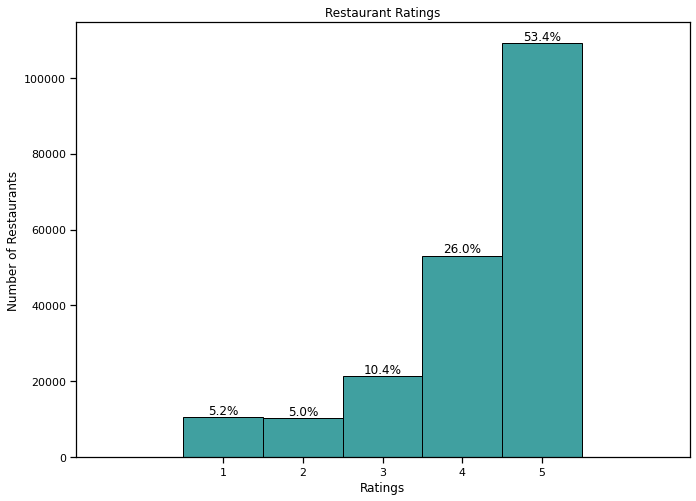

In [48]:
fig, ax = plt.subplots(figsize=(11,8))
sns.histplot(user_restaurant_df['user_rating'], bins = np.arange(8) - 0.5, color='teal', ax=ax)
ax.set_xticks(range(1,6))
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of Restaurants')
ax.set_title('Restaurant Ratings');

rating_count = user_restaurant_df['user_rating'].value_counts().sort_index()
for i, val in enumerate(rating_count.values):
    ax.text(i+1, val+5, (f'{round((val/sum(rating_count.values))*100, 1)}%'), ha='center', va='bottom',size=12)  
    
    

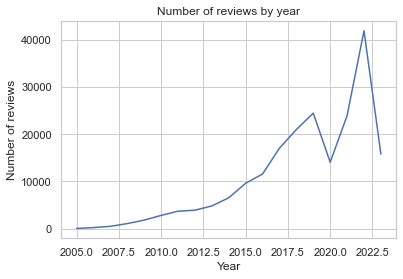

In [49]:
# Create a new column "Year" that contains the year of each review
user_restaurant_df["Year"] = user_restaurant_df["review_date"].str[-4:].astype(int)

# Group the reviews by year and count the number of reviews in each year
review_count_by_year = user_restaurant_df.groupby('Year').size().reset_index(name='Review count')

# Create a line plot of the review counts by year
sns.set(style="whitegrid")
ax = sns.lineplot(x="Year", y="Review count", data=review_count_by_year)

# Set the x-axis and y-axis labels and title
ax.set(xlabel='Year', ylabel='Number of reviews', title='Number of reviews by year')

# Show the plot
plt.show()


**2.3.1 Checking for the trend in restaurant ratings production over time**

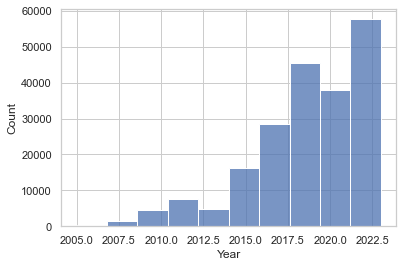

In [50]:
# Extract the years from the date column and create a new column with them
user_restaurant_df['Year'] = pd.DatetimeIndex(user_restaurant_df['review_date']).year

# Plot a histogram of the years using seaborn.histplot
sns.histplot(data=user_restaurant_df, x='Year', bins=10)

# Show the plot
plt.show()

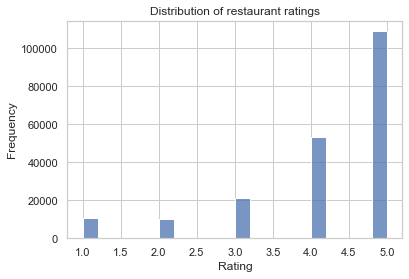

In [51]:
#Checking the distriburion of resturant ratings
sns.histplot(data=user_restaurant_df, x='user_rating', bins=20)
plt.title('Distribution of restaurant ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

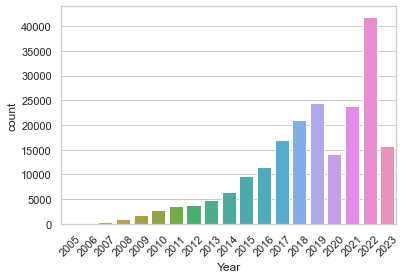

In [52]:
#Plot a countplot of the years using seaborn.countplot
sns.countplot(data=user_restaurant_df, x='Year')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

>* Conclusion: The amount of data retrieved over the years since 2008-2023 has been increasing exponentially over the years except for 2020 when there was a lock down. 2023 has merely reached its 1st quarter when we scraped the data

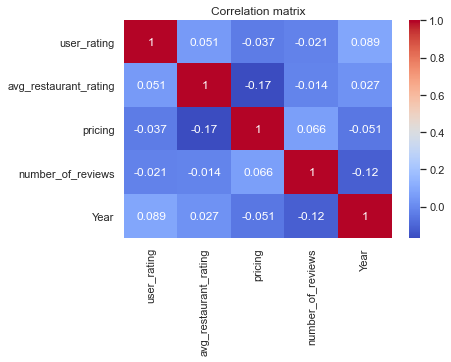

In [53]:
corr_matrix = user_restaurant_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation matrix')
plt.show()

>* From the correlation we see that most of our features have low collinearity since their correlation coefficient (usually the Pearson correlation coefficient) is close to 0 or between -0.3 and 0.3. This means that there is little or no linear relationship between the features and they are essentially independent. For this reason, we will retain all the features since they all have a unique information to show during moddeling



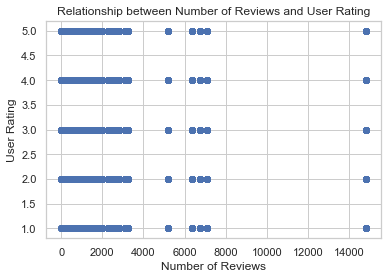

In [54]:
# create a scatter plot with number of reviews on the x-axis and user rating on the y-axis
plt.scatter(user_restaurant_df['number_of_reviews'], user_restaurant_df['user_rating'])

# set the axis labels and title
plt.xlabel('Number of Reviews')
plt.ylabel('User Rating')
plt.title('Relationship between Number of Reviews and User Rating')

# show the plot
plt.show()

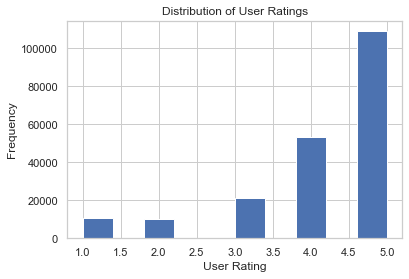

In [55]:
# create a histogram of user rating
plt.hist(user_restaurant_df['user_rating'], bins=10)

# set the axis labels and title
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings')

# show the plot
plt.show()

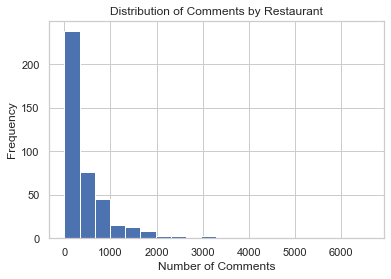

In [56]:
# group the data by restaurant ID and count the number of comments for each restaurant
comments_by_restaurant = user_restaurant_df.groupby('url')['comments'].count()

# create a histogram with the number of comments on the x-axis and frequency on the y-axis
plt.hist(comments_by_restaurant, bins=20)

# set the axis labels and title
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.title('Distribution of Comments by Restaurant')

# show the plot
plt.show()

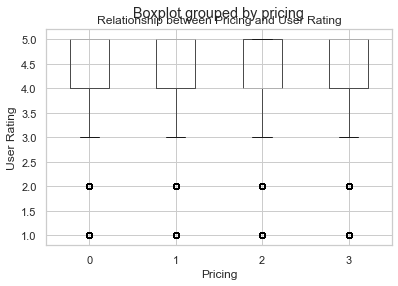

In [57]:
# create a box plot of user rating by pricing
user_restaurant_df.boxplot(column='user_rating', by='pricing')
plt.xlabel('Pricing')
plt.ylabel('User Rating')
plt.title('Relationship between Pricing and User Rating')
plt.show()

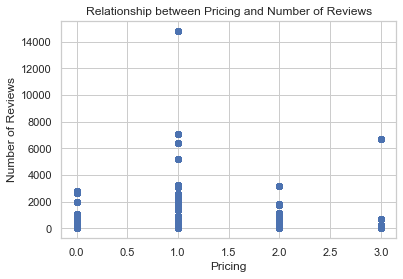

In [58]:
plt.scatter(user_restaurant_df['pricing'], user_restaurant_df['number_of_reviews'])
plt.xlabel('Pricing')
plt.ylabel('Number of Reviews')
plt.title('Relationship between Pricing and Number of Reviews')
plt.show()

In [ ]:
#dic_years = {}
#for years in user_revs_df['Date_of_review']:
    #if int(years[-4:]) in dic_years.keys():
        #dic_years[int(years[-4:])] += 1
    #else:
        #dic_years[int(years[-4:])] = 1
#list(dic_years.keys())

In [ ]:
# Pick out the number of restaurants already scraped in the users_revs side
#filtered_restaurant_df = restaurant_df[restaurant_df['URL'].isin(user_revs_df['URL'].unique())]
#filtered_restaurant_df

In [ ]:
#filtered_restaurant_df['Comments'] = ''

# loop through each row in the original dataframe
#for index, row in filtered_restaurant_df.iterrows():
    # reviews = row['Reviews']
    #url = row['URL']
    #reviews = []
    #holder = user_revs_df.loc[user_revs_df['URL'] == url].iterrows()
    #for row in holder:
        #comment = row[1]['Comment']
        #if row[1]['Comment'] != 'No comment':
            #reviews.append([comment])
    
    #filtered_restaurant_df['Comments'][filtered_restaurant_df['URL'] == url] = reviews

* The addition of the comments column that replaces the reviews column due to the fact the information within that column was difficult to extract continuously moving forward, hence, the main reason we chose to collect the necessary comments from there in its own column

# 2.5.0 Data Preprocessing

### 2.5.1. Data transformation

In [59]:
user_restaurant_df.head()

,user_ID,location,review_date,user_rating,comments,url,avg_restaurant_rating,pricing,transactions,reviews,cuisine,id,number_of_reviews,Year
0,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,"New York, NY",2/16/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,1,[],[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0,2023
1,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,1,[],[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0,2023
2,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,1,[],[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0,2022
3,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,1,[],[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0,2023
4,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,1,[],[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0,2022


<p>Switching all the comments and reviews rows to <strong>lower</strong> case</p>

In [60]:
# convert the comments and reviews columns to lowercase
user_restaurant_df['comments'] = user_restaurant_df['comments'].str.lower()
user_restaurant_df['reviews'] = user_restaurant_df['reviews'].str.lower()

In [61]:
user_restaurant_df.head()

,user_ID,location,review_date,user_rating,comments,url,avg_restaurant_rating,pricing,transactions,reviews,cuisine,id,number_of_reviews,Year
0,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,"New York, NY",2/16/2023,4.0,no comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,1,[],[{'text': 'yet another food hall opens up. the...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0,2023
1,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,no comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,1,[],[{'text': 'yet another food hall opens up. the...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0,2023
2,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,no comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,1,[],[{'text': 'yet another food hall opens up. the...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0,2022
3,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,urbanspace union square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,1,[],[{'text': 'yet another food hall opens up. the...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0,2023
4,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,no comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,1,[],[{'text': 'yet another food hall opens up. the...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0,2022


<p>Handling the <strong>transactions</strong> column so as to get a standard formatting style</p>

<p>Time to deal with the price column and convert the signs to meaningful values.
<br>Listing all the possible values of price in the dataset first</p>

<br>

* All the values on the user df are at the correct format as for now 


In [ ]:
# replacing the signs
#filtered_restaurant_df['price'].replace(['$$', '$$$$', '$', '$$$'], ['low', 'pricey-dining', 'popular-eats', 'mid-range'], inplace=True)

In [ ]:
#constituents_list = list(set(filtered_restaurant_df['location'].str.split(',').str[-2].str.strip(string.punctuation)))

In [ ]:
# viewing the locations restaurants are commonly located
#constituents_list

In [ ]:
# Need to work on locations
#filtered_restaurant_df['location'] = filtered_restaurant_df['location'].str.split(',').str[-2].str.strip(string.punctuation)
#display('All changes done before preprocessing on text data', filtered_restaurant_df.head())

### 2.5.2 Preprocess text data

<p> We chose to use NLTK word Lemmatizer and also remove English stop words and non alphabet tokens from reviews and style attributes. </p>

<p>Let's handle the function for that:</p>

In [114]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def process_sentences(text):
    temp_sent =[]

    # Tokenize words
    words = nltk.word_tokenize(text)

    # Lemmatize each of the words based on their position in the sentence
    tags = nltk.pos_tag(words)
    for i, word in enumerate(words):
        # only verbs
        if tags[i][1] in ('VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'):
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)
        
        # Remove stop words and non alphabet tokens
        if lemmatized not in stop_words and lemmatized.isalpha(): 
            temp_sent.append(lemmatized)

    # Some other clean-up
    full_sentence = ' '.join(temp_sent)
    full_sentence = full_sentence.replace("n't", " not")
    full_sentence = full_sentence.replace("'m", " am")
    full_sentence = full_sentence.replace("'s", " is")
    full_sentence = full_sentence.replace("'re", " are")
    full_sentence = full_sentence.replace("'ll", " will")
    full_sentence = full_sentence.replace("'ve", " have")
    full_sentence = full_sentence.replace("'d", " would")
    return full_sentence

In [115]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nyakerario\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [116]:
# creation of filtered comments
user_restaurant_df['processed_comments'] = user_restaurant_df['comments'].apply(process_sentences)

In [ ]:
# creation of filtered cuisines
user_restaurant_df['processed_cuisine'] = user_restaurant_df['cuisine'].apply(process_sentences)

In [ ]:
# creation of filtered transactions
filtered_restaurant_df['processed_transactions'] = filtered_restaurant_df['transactions'].apply(process_sentences)

* Time to compare the processed columns (i.e. cuisine & comments)

In [ ]:
filtered_restaurant_df[['processed_comments', 'comments', 'processed_cuisine', 'cuisine', 'processed_transactions', 'transactions']].sample(5)

<p>Eventually, let's create a bag_of_words with a combination of our new preprocessed attributes:</p>
<br>

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; <strong>bag of words=style processed+reviews processed</strong>

In [ ]:
filtered_restaurant_df['bogs'] = filtered_restaurant_df['processed_cuisine'] + ' ' + filtered_restaurant_df['processed_comments'] + ' ' + filtered_restaurant_df['processed_transactions']
display('A sample of bag of words', filtered_restaurant_df[['processed_comments', 'processed_cuisine', 'processed_transactions','bogs']].sample(5))

* The last transformation we needed to do was on the reclassified prices.
* We did a map of words to show synonymns of the price class in a way

In [ ]:
price_map = {
    'low':('everybody', 'no-expense', 'accomodating', 'inexpensive', 'cheap', 'ample', 'rock-bottom'), 
    'popular-eats': ('low-price', 'low-cost', 'economical', 'economic', 'modest'),
    'mid-range': ('moderate', 'fair', 'mid-price', 'reasonable', 'average'),
    'pricey-dining': ('expensive', 'fancy', 'lavish', 'fine', 'extravagant')
}

# Modeling

**a. Content Based Recommendation**

In [ ]:
def contentB_recommend(description):
    # Convert user input to lowercase
    description = description.lower()

    data = filtered_restaurant_df.copy()

    # Extract cities
    constituents_input = []
    for const in constituents_list:
        if const in description:
            constituents_input.append(const)
            description = description.replace(const, "")

    if constituents_input:
        data = data[data['location'].isin(constituents_input)]

    # Extract price class
    for key, value in price_map.items():
        if any(v in description for v in value):
            data = data[data['price'] == key]
            break
    
    # Process user description text input 
    description = process_sentences(description)
    description = description.strip()
    print('Processed user feedback:', description)

    # Init a TF-IDF vectorizer
    tfidfvec = TfidfVectorizer()

    # Fit data on processed reviews
    vec = tfidfvec.fit(data["bogs"])
    features = vec.transform(data["bogs"])

    # Transform user input data based on fitted model
    description_vector =  vec.transform([description])

    # Calculate cosine similarities between users processed input and reviews
    cos_sim = linear_kernel(description_vector, features)

    # Add similarities to data frame
    data['similarity'] = cos_sim[0]

    # Sort data frame by similarities
    data.sort_values(by='similarity', ascending=False, inplace=True)

    return data[['name', 'rating', 'location', 'price', 'cuisine', 'transactions', 'comments', 'similarity']]

In [ ]:
# specified cuisine
contentB_recommend('for chinese food')

In [ ]:
# with price class and location
contentB_recommend('a reasonable breakfast in Brooklyn')

In [ ]:
# with transaction and price class and location
contentB_recommend('a delivery shop for burgers in New york')

**b. CF based recommendation system**

* We will not be implementing Collaborative Filtering from scratch. 
 Instead, we will use the Surprise library that used extremely powerful algorithms like
**Singular Value Decomposition (SVD) to minimise RMSE (Root Mean Square Error) and give great recommendations.**

In [ ]:
# surprise reader
reader = Reader(rating_scale=(1, 5))

In [ ]:
data = Dataset.load_from_df(filtered_users_df[['user-id', 'restaurant-id', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.25)

In [ ]:
model = SVD()
# cross_validate(model, trainset, measures=['rmse', 'mae'], cv=5)

In [ ]:
# data_train = data.build_full_trainset()
model.fit(trainset)

In [ ]:
predictions = model.test(testset)

In [ ]:
# Viewing contents of test set
for uid, bid, rating in testset[:5]:
    print(f"User {uid} rated restaurant {bid} with a rating of {rating}")

In [ ]:
# Viewing predictions
for prediction in predictions[0:5]:
    print(prediction)

In [ ]:
# Print the performance metrics
accuracy.rmse(predictions)

In [ ]:
true_ratings = [pred.r_ui for pred in predictions]
est_ratings = [pred.est for pred in predictions]
uids = [pred.uid for pred in predictions]

**Recommending unseen restaurants to the test set**

In [ ]:
# Get list of user ids from test set
users = list(set(uids))

In [ ]:
# books which the users have not yet evaluated
restaurants = trainset.build_anti_testset()

In [ ]:
# using an example of 15 users
for user_id in users[0:15]:
    rests_seen = list(filter(lambda x: x[0] == user_id, restaurants))
    
    print(f'This user {user_id} has rated {len(rests_seen)} restaurants')
    
    # generate recommendations
    recommendations = model.test(rests_seen)
    recommendations.sort(key=operator.itemgetter(3), reverse=True)
    
    print(f"This user {user_id}'s recommendations:")
    # viewing 3 recommendations if available
    for reco in recommendations[0:3]:
        name = filtered_restaurant_df['name'][filtered_restaurant_df['id'] == (reco[1])]
        print(f'Restaurant {str(name)} with estimated rating {reco[3]}')

**c. Hybrid recommendation system**

* In this section, will try to build a simple hybrid recommender that brings together techniques we have implemented in the content based and collaborative filter based engines. This is how it will work

In [ ]:
id_map = pd.read_csv('restaurant_data.csv')
id_map.drop_duplicates(subset=['Restaurant ID'], inplace=True)
len(id_map)

In [ ]:
def hybrid_recommender(userId, description):
    # Convert user input to lowercase
    description = description.lower()

    data = filtered_restaurant_df.copy()

    # Extract cities
    constituents_input = []
    for const in constituents_list:
        if const in description:
            constituents_input.append(const)
            description = description.replace(const, "")

    if constituents_input:
        data = data[data['location'].isin(constituents_input)]

    # Extract price class
    for key, value in price_map.items():
        if any(v in description for v in value):
            data = data[data['price'] == key]
            break
    
    # Process user description text input 
    description = process_sentences(description)
    description = description.strip()
    print('Processed user feedback:', description)

    # Init a TF-IDF vectorizer
    tfidfvec = TfidfVectorizer()

    # Fit data on processed reviews
    vec = tfidfvec.fit(data["bogs"])
    features = vec.transform(data["bogs"])

    # Transform user input data based on fitted model
    description_vector =  vec.transform([description])

    # Calculate cosine similarities between users processed input and reviews
    cos_sim = linear_kernel(description_vector, features)
    
    # Add similarities to data frame
    data['similarity'] = cos_sim[0]
    sim_scores = list(cos_sim[0]
    print(sim_scores)
    
    restaurant_indices = [i for i in sim_scores]
    print(restaurant_indices)
    rest = data.iloc[restaurant_indices][['id', 'name', 'rating', 'location', 'cuisine', 'comments', 'num_id']]
    # print(rest)
    rest['est'] = rest['num_id'].apply(lambda x: model.predict(userId, id_map.loc[x]['Restaurant ID']).est)
    rest = rest.sort_values('est', ascending=False)
    return display('Predicted:', rest.head(10))

In [ ]:
filtered_users_df[filtered_users_df['user-id'] == 1]

In [ ]:
filtered_restaurant_df[filtered_restaurant_df['id'] == 'hdiuRS9sVZSMReZm4oV5SA']

In [ ]:
hybrid_recommender(8, 'korean')

# Evaluation

# Deployment